In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns

In [4]:
df = pd.read_csv("C:\\Users\\chann\\Downloads\\crime_data.csv")

In [5]:
df1 = df.copy()

In [6]:
df1.columns =["City","Murder","Assault","Urbanpop","Rape"]

In [7]:
df1.loc[:,"Total"] =df1.sum(numeric_only=True, axis=1)

In [8]:
df1.head()

,City,Murder,Assault,Urbanpop,Rape,Total
0,Alabama,13.2,236,58,21.2,328.4
1,Alaska,10.0,263,48,44.5,365.5
2,Arizona,8.1,294,80,31.0,413.1
3,Arkansas,8.8,190,50,19.5,268.3
4,California,9.0,276,91,40.6,416.6


In [36]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


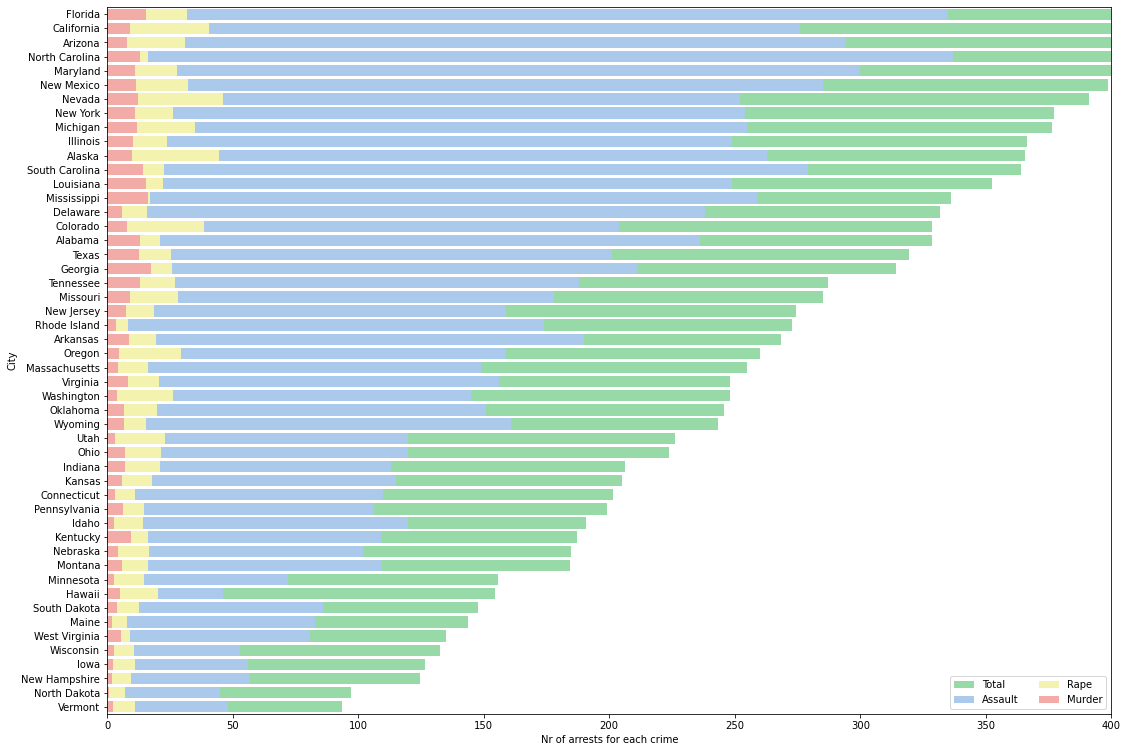

In [11]:
f, ax = plt.subplots(figsize=(18, 13))

stats = df1.sort_values("Total", ascending=False)

sns.set_color_codes("pastel")

sns.barplot(x="Total", y="City", data=stats,
            label="Total", color="g")

sns.barplot(x="Assault", y="City", data=stats,
            label="Assault", color="b")

sns.barplot(x="Rape", y="City", data=stats,
            label="Rape", color="y")

sns.barplot(x="Murder", y="City", data=stats,
            label="Murder", color="r")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 400), ylabel="City",
       xlabel="Nr of arrests for each crime");

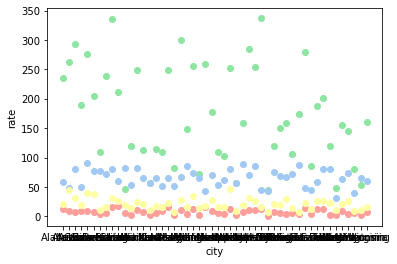

In [12]:
plt.scatter(df1.City, df1.Murder, color='r')
plt.scatter(df1.City, df1.Assault, color='g')
plt.scatter(df1.City, df1.Urbanpop, color='b')
plt.scatter(df1.City, df1.Rape, color='y')
plt.xlabel('city')
plt.ylabel('rate')
plt.show()

In [13]:
X = df1[['Murder', 'Assault', 'Rape', 'Urbanpop']]

In [16]:
df1_norm = preprocessing.scale(X)

In [17]:
df1_norm = pd.DataFrame(df1_norm)

In [18]:
df1_norm.head()

,0,1,2,3
0,1.255179,0.790787,-0.003451,-0.526195
1,0.513019,1.118060,2.509424,-1.224067
2,0.072361,1.493817,1.053466,1.009122
3,0.234708,0.233212,-0.186794,-1.084492
4,0.281093,1.275635,2.088814,1.776781


In [19]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
wc=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df1_norm)
    wc.append(kmeans.inertia_)
print(wc)

[200.0, 104.96163315756871, 80.08569526137276, 57.55425863091104, 50.05119672966492, 44.0921281550805, 40.675884795041114, 36.073709589324494, 31.61233134617762, 27.52584474051927, 24.648224142619902, 23.152196732541782, 21.223085654342803, 19.216501561636235]


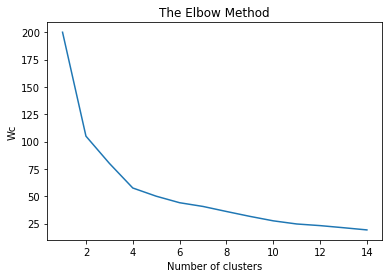

In [40]:
plt.plot(range(1, 15), wc)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Wc')
plt.show()

# The scree plot levels off at k=4 and let's use it to determine the clusters

In [25]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df1_norm)

In [26]:
y_kmeans

array([1, 3, 3, 1, 3, 3, 0, 0, 3, 1, 0, 2, 3, 0, 2, 0, 2, 1, 2, 3, 0, 3,
       2, 1, 3, 2, 2, 3, 2, 0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 1, 2, 1, 3, 0,
       2, 0, 0, 2, 2, 0])

In [27]:
y_kmeans1=y_kmeans+1
cluster = list(y_kmeans1)

In [28]:
df1['cluster'] = cluster

In [29]:
kmeans_mean_cluster = pd.DataFrame(round(df1.groupby('cluster').mean(),1))
kmeans_mean_cluster

,Murder,Assault,Urbanpop,Rape,Total
cluster,,,,,
1,5.7,138.9,73.9,18.8,237.2
2,13.9,243.6,53.8,21.4,332.7
3,3.6,78.5,52.1,12.2,146.4
4,10.8,257.4,76.0,33.2,377.4


<AxesSubplot:xlabel='Murder', ylabel='Assault'>

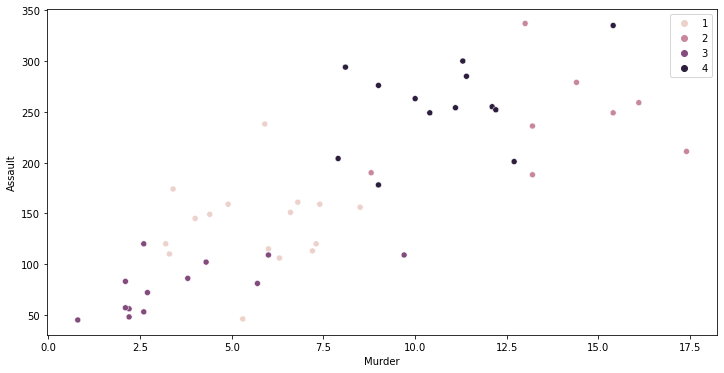

In [38]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Assault'],hue=y_kmeans1)

<AxesSubplot:xlabel='Murder', ylabel='Rape'>

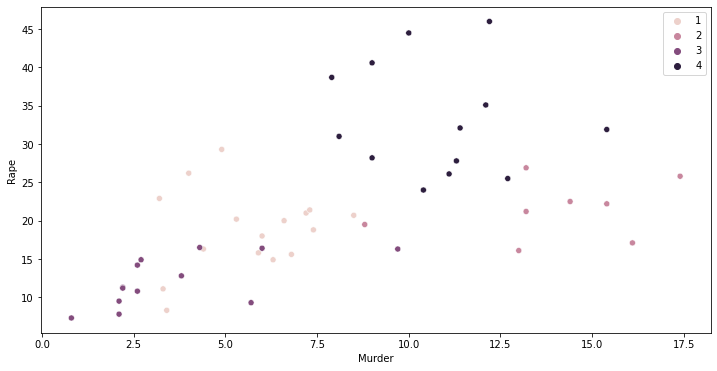

In [31]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Murder'], y = df1['Rape'],hue=y_kmeans1)

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

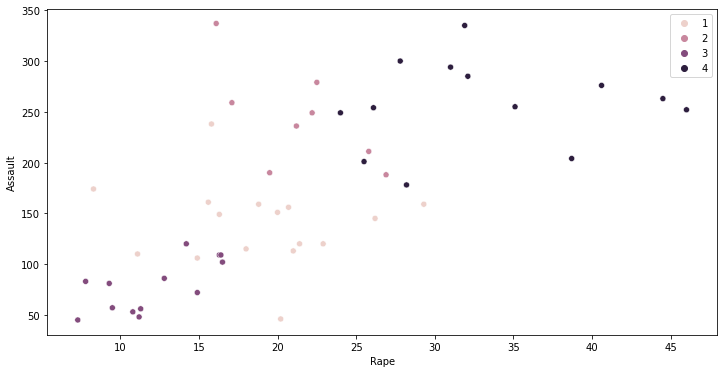

In [32]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df1['Rape'], y = df1['Assault'],hue=y_kmeans1)

In [33]:
stats = df1.sort_values("Total", ascending=True)
df1_total= pd.DataFrame(stats)

In [41]:
df1_total

,City,Murder,Assault,Urbanpop,Rape,Total,cluster
44,Vermont,2.2,48,32,11.2,93.4,3
33,North Dakota,0.8,45,44,7.3,97.1,3
28,New Hampshire,2.1,57,56,9.5,124.6,3
14,Iowa,2.2,56,57,11.3,126.5,3
48,Wisconsin,2.6,53,66,10.8,132.4,3
47,West Virginia,5.7,81,39,9.3,135.0,3
18,Maine,2.1,83,51,7.8,143.9,3
40,South Dakota,3.8,86,45,12.8,147.6,3
10,Hawaii,5.3,46,83,20.2,154.5,1
22,Minnesota,2.7,72,66,14.9,155.6,3


Analysing Murder and Assault variables shows a clearer connection between them. Higher the murder rates in a city higer the assaults and vice versa

Contrary to murders and assaults, there is much more spread among the clusters when comparing murders and rapes. Some correlation is visible, but low murder rates in a city seem to indicate lower number of rapes and vice versa

As with murder and assault, also rates of rape and assault show clearer correlations